# 1 Install Package

In [5]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2 Load data
 model_1 is egg \
 model_2 is PMD \
 model_3 is TDP 

In [6]:
filepath_model_1 = "data/egg_distance_stl_Cloud.csv"
filepath_model_2 = "data/PMD_distance_stl - Cloud.csv"
filepath_model_3 = "data/TDP_distance_stl - Cloud.csv"

model_1 = pd.read_csv(filepath_model_1)
model_2 = pd.read_csv(filepath_model_2)
model_3 = pd.read_csv(filepath_model_3)

## 2.1Then show a brief view of the model_1

In [7]:
model_1.head()

,//X,Y,Z,Temp. approx. distances,Roughness (0.781197),Mean curvature (0.781197),Gaussian curvature (0.781197),Normal change rate (0.781197),Number of neighbors (r=0.781197),Surface density (r=0.781197),...,Planarity (0.781197),Linearity (0.781197),PCA1 (0.781197),PCA2 (0.781197),Surface variation (0.781197),Sphericity (0.781197),Verticality (0.781197),Nx,Ny,Nz
0,19.068060,-11.560005,0.000004,-0.306077,0.000816,0.001143,0.000000,0.000001,13.0,6.780665,...,0.276412,0.723587,0.783444,0.216554,0.000001,0.000002,0.764433,0.951514,-0.196258,0.236863
1,19.068062,-11.559999,0.000004,-0.306077,0.000818,0.001143,0.000000,0.000001,13.0,6.780665,...,0.276412,0.723587,0.783444,0.216554,0.000001,0.000002,0.764433,0.000978,0.000978,0.999999
2,-19.069937,11.558008,0.000004,-0.425199,0.000053,0.000255,0.000028,0.000001,13.0,6.780665,...,0.276381,0.723618,0.783463,0.216535,0.000001,0.000002,0.762576,-0.950901,0.196132,0.239416
3,-19.069939,11.558002,0.000004,-0.425198,0.000055,0.000255,0.000028,0.000001,13.0,6.780665,...,0.276381,0.723618,0.783463,0.216535,0.000001,0.000002,0.762576,0.000978,0.000978,0.999999
4,18.070063,-16.384005,0.000004,-0.186776,0.000818,0.002835,0.000002,0.000001,13.0,6.780665,...,0.276605,0.723393,0.783326,0.216673,0.000001,0.000002,0.761185,0.950131,-0.199243,0.239905


## 2.2 Sort the points along the z axis and view the number of points along the z direction

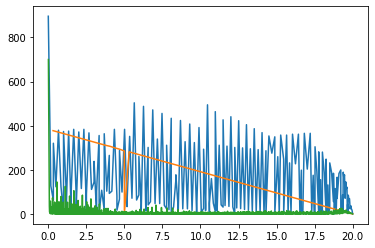

In [8]:
layer_number_1 = model_1['Z'].value_counts().sort_index()
layer_number_2 = model_2['Z'].value_counts().sort_index()
layer_number_3 = model_3['Z'].value_counts().sort_index()

layer_number_1.plot()
layer_number_2.plot()
layer_number_3.plot()
plt.show()

# 3 Preprocessing

In [9]:
def Preprocessing(model_1):
    # add a column as approximate z where delta z = 0.1
    model_1['appro_z'] = round(model_1['Z']*2)/2
    layer_number_1 = model_1['appro_z'].value_counts().sort_index()
    
    # add a column ['theta'] as theta
    model_1['theta'] = model_1.apply(lambda x: np.arctan2(x['Y'],x['//X']), axis = 1)
    model_1['theta']
    
    # add a column ['R'] as the radius in polar coordinates
    R2 = model_1.apply(lambda x: x['//X']**2 + x['Y']**2 + x['Z']**2 ,axis = 1)
    model_1['R'] = np.sqrt(R2)
    model_1['R']
    
    # add a column ['r'] as the radius in cylindrical coordinates
    r2 = model_1.apply(lambda x: x['//X']**2 + x['Y']**2,axis = 1)
    model_1['r'] = np.sqrt(r2)
    model_1['r']
    return model_1.head()

In [10]:
Preprocessing(model_1)
Preprocessing(model_2)
Preprocessing(model_3)

,//X,Y,Z,Temp. approx. distances,Roughness (0.854526),Mean curvature (0.854526),Gaussian curvature (0.854526),Normal change rate (0.854526),Number of neighbors (r=0.854526),Surface density (r=0.854526),...,Surface variation (0.854526),Sphericity (0.854526),Verticality (0.854526),Nx,Ny,Nz,appro_z,theta,R,r
0,16.506958,-11.407999,0.007309,-0.251701,0.001076,0.001419,0.000041,0.000002,20.0,8.718255,...,0.000002,0.000003,0.887594,0.859991,-0.498192,0.110550,0.0,-0.604729,20.065447,20.065446
1,16.263357,-11.827134,0.007309,-0.277180,0.000463,0.001603,0.000003,0.000001,21.0,9.154167,...,0.000001,0.000001,0.887160,0.859714,-0.498031,0.113385,0.0,-0.628766,20.109151,20.109149
2,-16.508957,-11.407999,0.007309,-0.069784,0.000391,0.001048,0.000003,0.000001,20.0,8.718255,...,0.000001,0.000001,0.886184,-0.860942,-0.495868,0.113547,0.0,-2.536920,20.067091,20.067090
3,-16.523348,-11.383106,0.007309,-0.067225,0.000450,0.000199,0.000008,0.000001,21.0,9.154167,...,0.000001,0.000001,0.886254,-0.860942,-0.495868,0.113547,0.0,-2.538348,20.064800,20.064798
4,-16.239000,-11.875999,0.007309,-0.029465,0.000628,0.001394,0.000003,0.000001,21.0,9.154167,...,0.000001,0.000001,0.885942,-0.859714,-0.498031,0.113385,0.0,-2.510151,20.118264,20.118263


# 4 Build a batch
batch shape: [theta, x, y, z ... other features]

Here theta is the approximate theta. We divide a circle into 500 pieces, take the nearest point as the sample point.

It should be noticed that when we take the sample points, we use approximate z as the criteria of one layer.But we keep the original z values as input. 

output shape: ['Temp. approx. distances'] shape(model_size,batch_size,1)

In [11]:
def build_batch(model_1):
    # precision
    model_size = len(model_1.groupby(['appro_z']).size()) # how many layers we have == batch size
    theta_size = 500 # how many pieces in one layer == time step
    feature_len = len(model_1.columns)  # how many features we have (‘appro z’ is not a feature)
    
    index = model_1.columns # store the column title 
    input_seq = np.zeros((model_size,theta_size,feature_len), dtype = np.float32)
    output_seq = np.zeros((model_size,theta_size,1), dtype = np.float32)

    for i in range (model_size):
        for u in range(theta_size):
            target_theta = (np.pi * 2 / 500 * u)-np.pi
            current_layer = 0.5 * i
            current = model_1[model_1['appro_z'] == current_layer]

            if len(current) != 0:
            # find the point that is nearest the target angle
                sample_ID = current['theta'].map(lambda x : abs(x-target_theta)).idxmin()
                current = current.loc[sample_ID]
                output_seq[i,u] = current['Temp. approx. distances']

                current = current.drop(labels = ['appro_z'])
                current = pd.concat([pd.Series([target_theta]), current], ignore_index = True)
                input_seq[i,u] = current
    return input_seq, output_seq

In [12]:
input1, output1 = build_batch(model_1)
input2, output2 = build_batch(model_2)
input3, output3 = build_batch(model_3)

# 3 Prepare the training set
Set the training set as the points of the egg shape and pyramid shape. 
The input data structure is (total_layer_number, theta_number, features)

In [9]:
input = np.concatenate((input1, input2), axis=0)
input = np.delete(input,0,2)
input = np.delete(input,3,2)
output = np.concatenate((output1, output2), axis=0)
output = output*10
print(np.shape(output))
print(np.shape(input))


(81, 500, 1)
(81, 500, 27)


# 4 Hyper Parameters

In [10]:
#  model_size = len(model_1.groupby(['appro_z']).size()) # how many layers we have
#  theta_size = 500 # how many pieces in one layer
#  feature_len = len(model_1.columns)  # how many features we have (‘appro z’ is not a feature)
TIME_STEP = 500      # rnn time step
INPUT_SIZE = len(input[0][0][:])      # rnn input size
LR = 0.01           # learning rate

# 5 Define the RNN model with LSTM structure

In [11]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1)
    
rnn = RNN()

Check the structure of RNN model

In [12]:
print(rnn)

RNN(
  (rnn): LSTM(27, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


# 6 Training
Use Adam boost method to optimize the parameter

tensor(2.4475, grad_fn=<MseLossBackward>)
0


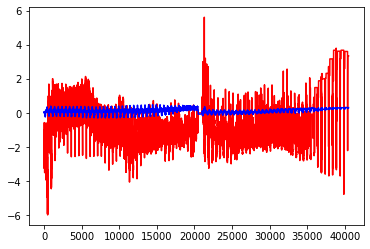

tensor(1.8306, grad_fn=<MseLossBackward>)
tensor(1.6759, grad_fn=<MseLossBackward>)
tensor(1.5136, grad_fn=<MseLossBackward>)
tensor(1.3634, grad_fn=<MseLossBackward>)
tensor(1.2533, grad_fn=<MseLossBackward>)
tensor(1.1317, grad_fn=<MseLossBackward>)
tensor(0.9998, grad_fn=<MseLossBackward>)
tensor(0.9423, grad_fn=<MseLossBackward>)
tensor(0.8306, grad_fn=<MseLossBackward>)
tensor(0.7620, grad_fn=<MseLossBackward>)
10


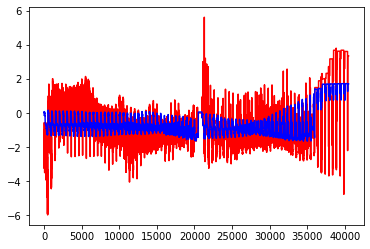

tensor(0.7014, grad_fn=<MseLossBackward>)
tensor(0.6523, grad_fn=<MseLossBackward>)
tensor(0.5991, grad_fn=<MseLossBackward>)
tensor(0.5601, grad_fn=<MseLossBackward>)
tensor(0.5207, grad_fn=<MseLossBackward>)
tensor(0.4962, grad_fn=<MseLossBackward>)
tensor(0.4659, grad_fn=<MseLossBackward>)
tensor(0.4428, grad_fn=<MseLossBackward>)
tensor(0.4497, grad_fn=<MseLossBackward>)
tensor(0.4412, grad_fn=<MseLossBackward>)
20


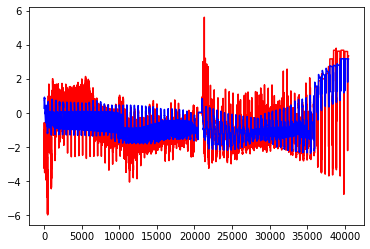

tensor(0.4427, grad_fn=<MseLossBackward>)
tensor(0.4160, grad_fn=<MseLossBackward>)
tensor(0.4117, grad_fn=<MseLossBackward>)
tensor(0.3934, grad_fn=<MseLossBackward>)
tensor(0.3789, grad_fn=<MseLossBackward>)
tensor(0.3749, grad_fn=<MseLossBackward>)
tensor(0.3610, grad_fn=<MseLossBackward>)
tensor(0.3450, grad_fn=<MseLossBackward>)
tensor(0.3512, grad_fn=<MseLossBackward>)
tensor(0.3348, grad_fn=<MseLossBackward>)
30


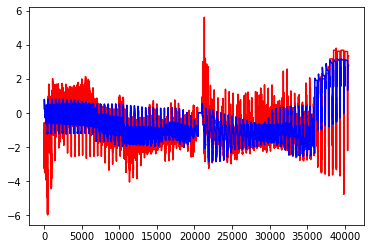

tensor(0.3239, grad_fn=<MseLossBackward>)
tensor(0.3132, grad_fn=<MseLossBackward>)
tensor(0.3175, grad_fn=<MseLossBackward>)
tensor(0.3133, grad_fn=<MseLossBackward>)
tensor(0.3127, grad_fn=<MseLossBackward>)
tensor(0.3014, grad_fn=<MseLossBackward>)
tensor(0.3003, grad_fn=<MseLossBackward>)
tensor(0.3041, grad_fn=<MseLossBackward>)
tensor(0.3231, grad_fn=<MseLossBackward>)
tensor(0.2934, grad_fn=<MseLossBackward>)
40


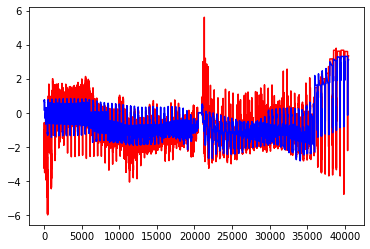

tensor(0.2797, grad_fn=<MseLossBackward>)
tensor(0.2821, grad_fn=<MseLossBackward>)
tensor(0.2726, grad_fn=<MseLossBackward>)
tensor(0.2739, grad_fn=<MseLossBackward>)
tensor(0.2607, grad_fn=<MseLossBackward>)
tensor(0.2618, grad_fn=<MseLossBackward>)
tensor(0.2501, grad_fn=<MseLossBackward>)
tensor(0.2536, grad_fn=<MseLossBackward>)
tensor(0.2499, grad_fn=<MseLossBackward>)
tensor(0.2463, grad_fn=<MseLossBackward>)
50


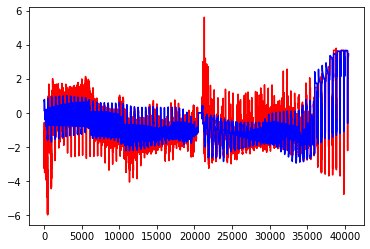

tensor(0.2377, grad_fn=<MseLossBackward>)
tensor(0.2338, grad_fn=<MseLossBackward>)
tensor(0.2260, grad_fn=<MseLossBackward>)
tensor(0.2244, grad_fn=<MseLossBackward>)
tensor(0.2237, grad_fn=<MseLossBackward>)
tensor(0.2231, grad_fn=<MseLossBackward>)
tensor(0.2139, grad_fn=<MseLossBackward>)
tensor(0.2231, grad_fn=<MseLossBackward>)
tensor(0.2110, grad_fn=<MseLossBackward>)
tensor(0.2149, grad_fn=<MseLossBackward>)
60


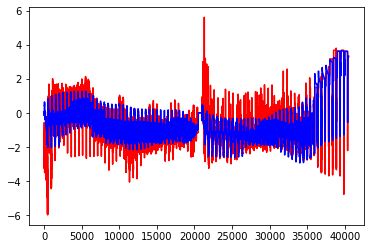

tensor(0.2078, grad_fn=<MseLossBackward>)
tensor(0.2043, grad_fn=<MseLossBackward>)
tensor(0.2019, grad_fn=<MseLossBackward>)
tensor(0.1959, grad_fn=<MseLossBackward>)
tensor(0.1843, grad_fn=<MseLossBackward>)
tensor(0.1848, grad_fn=<MseLossBackward>)
tensor(0.1794, grad_fn=<MseLossBackward>)
tensor(0.1771, grad_fn=<MseLossBackward>)
tensor(0.1889, grad_fn=<MseLossBackward>)
tensor(0.1987, grad_fn=<MseLossBackward>)
70


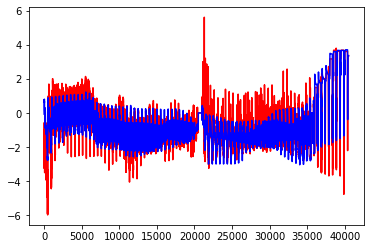

tensor(0.2043, grad_fn=<MseLossBackward>)
tensor(0.1867, grad_fn=<MseLossBackward>)
tensor(0.2172, grad_fn=<MseLossBackward>)
tensor(0.2042, grad_fn=<MseLossBackward>)
tensor(0.2493, grad_fn=<MseLossBackward>)
tensor(0.2496, grad_fn=<MseLossBackward>)
tensor(0.2502, grad_fn=<MseLossBackward>)
tensor(0.2442, grad_fn=<MseLossBackward>)
tensor(0.2403, grad_fn=<MseLossBackward>)
tensor(0.2305, grad_fn=<MseLossBackward>)
80


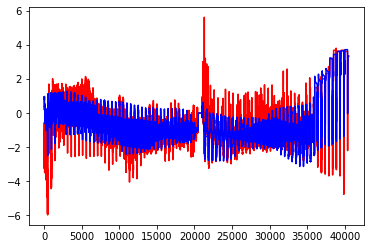

tensor(0.2163, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)
tensor(0.1954, grad_fn=<MseLossBackward>)
tensor(0.1874, grad_fn=<MseLossBackward>)
tensor(0.1874, grad_fn=<MseLossBackward>)
tensor(0.1941, grad_fn=<MseLossBackward>)
tensor(0.2086, grad_fn=<MseLossBackward>)
tensor(0.2268, grad_fn=<MseLossBackward>)
tensor(0.1970, grad_fn=<MseLossBackward>)
tensor(0.2071, grad_fn=<MseLossBackward>)
90


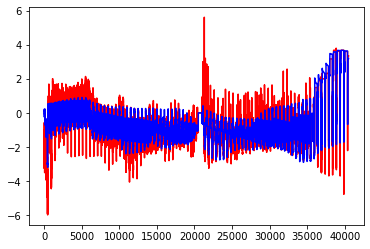

tensor(0.2053, grad_fn=<MseLossBackward>)
tensor(0.1942, grad_fn=<MseLossBackward>)
tensor(0.1859, grad_fn=<MseLossBackward>)
tensor(0.1867, grad_fn=<MseLossBackward>)
tensor(0.1716, grad_fn=<MseLossBackward>)
tensor(0.1830, grad_fn=<MseLossBackward>)
tensor(0.1729, grad_fn=<MseLossBackward>)
tensor(0.1740, grad_fn=<MseLossBackward>)
tensor(0.1664, grad_fn=<MseLossBackward>)
tensor(0.1631, grad_fn=<MseLossBackward>)
100


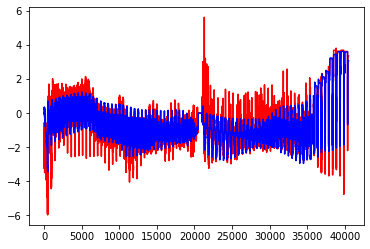

tensor(0.1604, grad_fn=<MseLossBackward>)
tensor(0.1570, grad_fn=<MseLossBackward>)
tensor(0.1565, grad_fn=<MseLossBackward>)
tensor(0.1538, grad_fn=<MseLossBackward>)
tensor(0.1580, grad_fn=<MseLossBackward>)
tensor(0.1466, grad_fn=<MseLossBackward>)
tensor(0.1514, grad_fn=<MseLossBackward>)
tensor(0.1521, grad_fn=<MseLossBackward>)
tensor(0.1501, grad_fn=<MseLossBackward>)
tensor(0.1580, grad_fn=<MseLossBackward>)
110


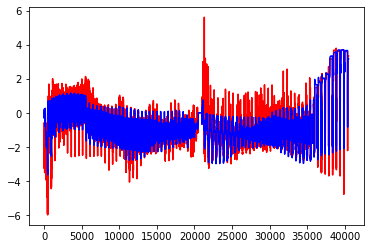

tensor(0.1565, grad_fn=<MseLossBackward>)
tensor(0.1473, grad_fn=<MseLossBackward>)
tensor(0.1474, grad_fn=<MseLossBackward>)
tensor(0.1425, grad_fn=<MseLossBackward>)
tensor(0.1378, grad_fn=<MseLossBackward>)
tensor(0.1322, grad_fn=<MseLossBackward>)
tensor(0.1338, grad_fn=<MseLossBackward>)
tensor(0.1341, grad_fn=<MseLossBackward>)
tensor(0.1322, grad_fn=<MseLossBackward>)
tensor(0.1293, grad_fn=<MseLossBackward>)
120


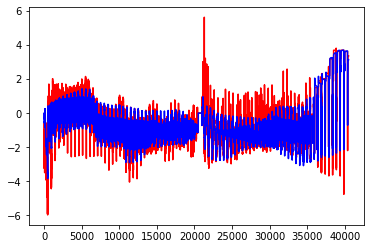

tensor(0.1289, grad_fn=<MseLossBackward>)
tensor(0.1238, grad_fn=<MseLossBackward>)
tensor(0.1229, grad_fn=<MseLossBackward>)
tensor(0.1226, grad_fn=<MseLossBackward>)
tensor(0.1207, grad_fn=<MseLossBackward>)
tensor(0.1170, grad_fn=<MseLossBackward>)
tensor(0.1150, grad_fn=<MseLossBackward>)
tensor(0.1141, grad_fn=<MseLossBackward>)
tensor(0.1126, grad_fn=<MseLossBackward>)
tensor(0.1114, grad_fn=<MseLossBackward>)
130


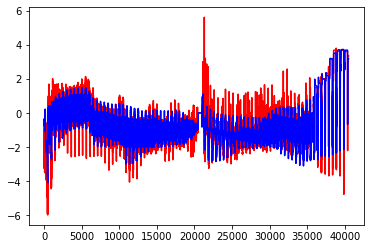

tensor(0.1098, grad_fn=<MseLossBackward>)
tensor(0.1079, grad_fn=<MseLossBackward>)
tensor(0.1077, grad_fn=<MseLossBackward>)
tensor(0.1066, grad_fn=<MseLossBackward>)
tensor(0.1081, grad_fn=<MseLossBackward>)
tensor(0.1074, grad_fn=<MseLossBackward>)
tensor(0.1060, grad_fn=<MseLossBackward>)
tensor(0.1036, grad_fn=<MseLossBackward>)
tensor(0.1042, grad_fn=<MseLossBackward>)
tensor(0.1018, grad_fn=<MseLossBackward>)
140


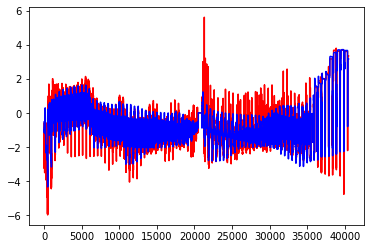

tensor(0.1024, grad_fn=<MseLossBackward>)
tensor(0.1071, grad_fn=<MseLossBackward>)
tensor(0.1021, grad_fn=<MseLossBackward>)
tensor(0.1001, grad_fn=<MseLossBackward>)
tensor(0.1016, grad_fn=<MseLossBackward>)
tensor(0.1001, grad_fn=<MseLossBackward>)
tensor(0.0981, grad_fn=<MseLossBackward>)
tensor(0.0978, grad_fn=<MseLossBackward>)
tensor(0.0966, grad_fn=<MseLossBackward>)
tensor(0.0946, grad_fn=<MseLossBackward>)
150


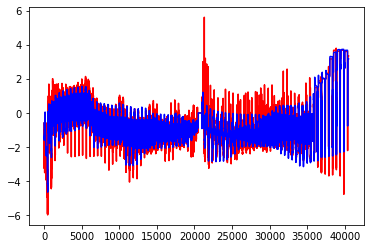

tensor(0.0949, grad_fn=<MseLossBackward>)
tensor(0.0924, grad_fn=<MseLossBackward>)
tensor(0.0931, grad_fn=<MseLossBackward>)
tensor(0.0913, grad_fn=<MseLossBackward>)
tensor(0.0902, grad_fn=<MseLossBackward>)
tensor(0.0885, grad_fn=<MseLossBackward>)
tensor(0.0889, grad_fn=<MseLossBackward>)
tensor(0.0894, grad_fn=<MseLossBackward>)
tensor(0.0940, grad_fn=<MseLossBackward>)
tensor(0.1540, grad_fn=<MseLossBackward>)
160


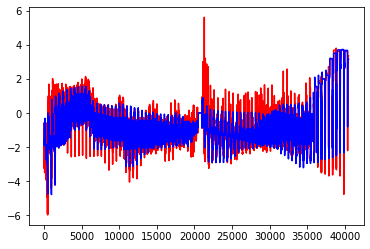

tensor(0.1583, grad_fn=<MseLossBackward>)
tensor(0.1509, grad_fn=<MseLossBackward>)
tensor(0.1495, grad_fn=<MseLossBackward>)
tensor(0.1501, grad_fn=<MseLossBackward>)
tensor(0.1401, grad_fn=<MseLossBackward>)
tensor(0.1462, grad_fn=<MseLossBackward>)
tensor(0.1572, grad_fn=<MseLossBackward>)
tensor(0.1611, grad_fn=<MseLossBackward>)
tensor(0.1554, grad_fn=<MseLossBackward>)
tensor(0.1638, grad_fn=<MseLossBackward>)
170


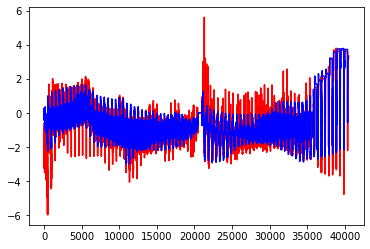

tensor(0.1512, grad_fn=<MseLossBackward>)
tensor(0.1515, grad_fn=<MseLossBackward>)
tensor(0.1450, grad_fn=<MseLossBackward>)
tensor(0.1321, grad_fn=<MseLossBackward>)
tensor(0.1353, grad_fn=<MseLossBackward>)
tensor(0.1300, grad_fn=<MseLossBackward>)
tensor(0.1290, grad_fn=<MseLossBackward>)
tensor(0.1311, grad_fn=<MseLossBackward>)
tensor(0.1237, grad_fn=<MseLossBackward>)
tensor(0.1285, grad_fn=<MseLossBackward>)
180


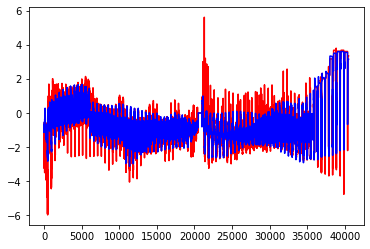

tensor(0.1214, grad_fn=<MseLossBackward>)
tensor(0.1225, grad_fn=<MseLossBackward>)
tensor(0.1180, grad_fn=<MseLossBackward>)
tensor(0.1134, grad_fn=<MseLossBackward>)
tensor(0.1133, grad_fn=<MseLossBackward>)
tensor(0.1120, grad_fn=<MseLossBackward>)
tensor(0.1089, grad_fn=<MseLossBackward>)
tensor(0.1065, grad_fn=<MseLossBackward>)
tensor(0.1073, grad_fn=<MseLossBackward>)
tensor(0.1032, grad_fn=<MseLossBackward>)
190


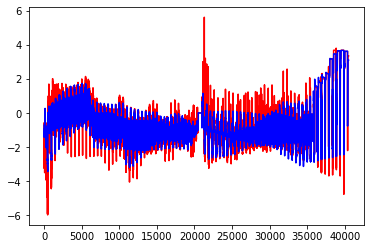

tensor(0.1025, grad_fn=<MseLossBackward>)
tensor(0.0994, grad_fn=<MseLossBackward>)
tensor(0.1004, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0967, grad_fn=<MseLossBackward>)
tensor(0.0994, grad_fn=<MseLossBackward>)
tensor(0.0968, grad_fn=<MseLossBackward>)
tensor(0.0937, grad_fn=<MseLossBackward>)
tensor(0.0957, grad_fn=<MseLossBackward>)
tensor(0.0949, grad_fn=<MseLossBackward>)
200


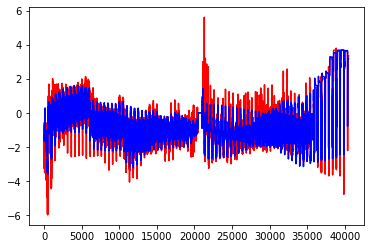

tensor(0.0917, grad_fn=<MseLossBackward>)
tensor(0.0911, grad_fn=<MseLossBackward>)
tensor(0.0902, grad_fn=<MseLossBackward>)
tensor(0.0888, grad_fn=<MseLossBackward>)
tensor(0.0888, grad_fn=<MseLossBackward>)
tensor(0.0862, grad_fn=<MseLossBackward>)
tensor(0.0861, grad_fn=<MseLossBackward>)
tensor(0.0856, grad_fn=<MseLossBackward>)
tensor(0.0849, grad_fn=<MseLossBackward>)
tensor(0.0834, grad_fn=<MseLossBackward>)
210


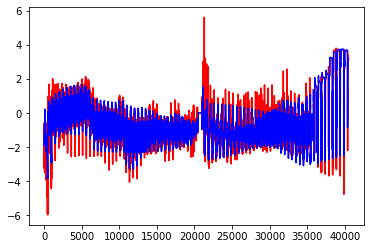

tensor(0.0832, grad_fn=<MseLossBackward>)
tensor(0.0825, grad_fn=<MseLossBackward>)
tensor(0.0827, grad_fn=<MseLossBackward>)
tensor(0.0824, grad_fn=<MseLossBackward>)
tensor(0.0824, grad_fn=<MseLossBackward>)
tensor(0.0847, grad_fn=<MseLossBackward>)
tensor(0.0841, grad_fn=<MseLossBackward>)
tensor(0.0802, grad_fn=<MseLossBackward>)
tensor(0.0799, grad_fn=<MseLossBackward>)
tensor(0.0805, grad_fn=<MseLossBackward>)
220


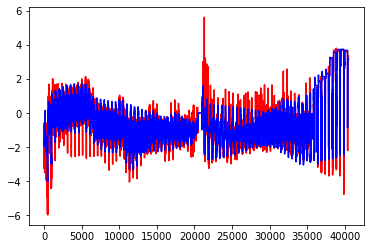

tensor(0.0808, grad_fn=<MseLossBackward>)
tensor(0.0788, grad_fn=<MseLossBackward>)
tensor(0.0777, grad_fn=<MseLossBackward>)
tensor(0.0778, grad_fn=<MseLossBackward>)
tensor(0.0780, grad_fn=<MseLossBackward>)
tensor(0.0769, grad_fn=<MseLossBackward>)
tensor(0.0754, grad_fn=<MseLossBackward>)
tensor(0.0753, grad_fn=<MseLossBackward>)
tensor(0.0759, grad_fn=<MseLossBackward>)
tensor(0.0756, grad_fn=<MseLossBackward>)
230


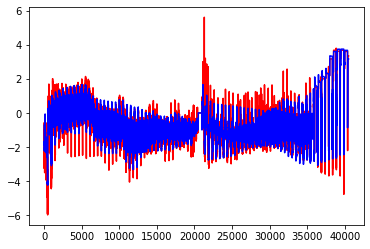

tensor(0.0750, grad_fn=<MseLossBackward>)
tensor(0.0739, grad_fn=<MseLossBackward>)
tensor(0.0726, grad_fn=<MseLossBackward>)
tensor(0.0722, grad_fn=<MseLossBackward>)
tensor(0.0724, grad_fn=<MseLossBackward>)
tensor(0.0727, grad_fn=<MseLossBackward>)
tensor(0.0730, grad_fn=<MseLossBackward>)
tensor(0.0732, grad_fn=<MseLossBackward>)
tensor(0.0727, grad_fn=<MseLossBackward>)
tensor(0.0720, grad_fn=<MseLossBackward>)
240


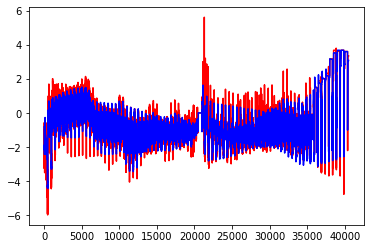

tensor(0.0709, grad_fn=<MseLossBackward>)
tensor(0.0700, grad_fn=<MseLossBackward>)
tensor(0.0694, grad_fn=<MseLossBackward>)
tensor(0.0689, grad_fn=<MseLossBackward>)
tensor(0.0692, grad_fn=<MseLossBackward>)
tensor(0.0696, grad_fn=<MseLossBackward>)
tensor(0.0706, grad_fn=<MseLossBackward>)
tensor(0.0719, grad_fn=<MseLossBackward>)
tensor(0.0719, grad_fn=<MseLossBackward>)
tensor(0.0718, grad_fn=<MseLossBackward>)
250


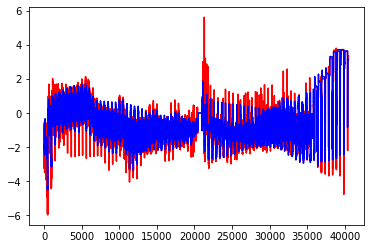

tensor(0.0701, grad_fn=<MseLossBackward>)
tensor(0.0686, grad_fn=<MseLossBackward>)
tensor(0.0667, grad_fn=<MseLossBackward>)
tensor(0.0667, grad_fn=<MseLossBackward>)
tensor(0.0671, grad_fn=<MseLossBackward>)
tensor(0.0680, grad_fn=<MseLossBackward>)
tensor(0.0691, grad_fn=<MseLossBackward>)
tensor(0.0694, grad_fn=<MseLossBackward>)
tensor(0.0702, grad_fn=<MseLossBackward>)
tensor(0.0678, grad_fn=<MseLossBackward>)
260


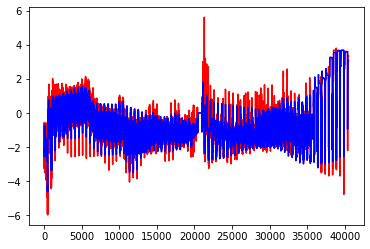

tensor(0.0663, grad_fn=<MseLossBackward>)
tensor(0.0644, grad_fn=<MseLossBackward>)
tensor(0.0648, grad_fn=<MseLossBackward>)
tensor(0.0655, grad_fn=<MseLossBackward>)
tensor(0.0674, grad_fn=<MseLossBackward>)
tensor(0.0705, grad_fn=<MseLossBackward>)
tensor(0.0706, grad_fn=<MseLossBackward>)
tensor(0.0706, grad_fn=<MseLossBackward>)
tensor(0.0669, grad_fn=<MseLossBackward>)
tensor(0.0646, grad_fn=<MseLossBackward>)
270


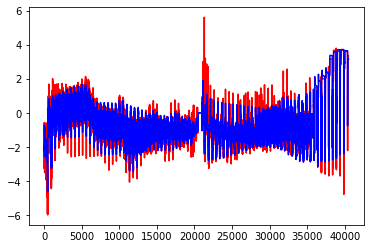

tensor(0.0632, grad_fn=<MseLossBackward>)
tensor(0.0655, grad_fn=<MseLossBackward>)
tensor(0.0675, grad_fn=<MseLossBackward>)
tensor(0.0684, grad_fn=<MseLossBackward>)
tensor(0.0666, grad_fn=<MseLossBackward>)
tensor(0.0638, grad_fn=<MseLossBackward>)
tensor(0.0626, grad_fn=<MseLossBackward>)
tensor(0.0626, grad_fn=<MseLossBackward>)
tensor(0.0643, grad_fn=<MseLossBackward>)
tensor(0.0644, grad_fn=<MseLossBackward>)
280


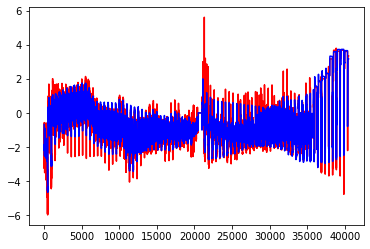

tensor(0.0640, grad_fn=<MseLossBackward>)
tensor(0.0624, grad_fn=<MseLossBackward>)
tensor(0.0614, grad_fn=<MseLossBackward>)
tensor(0.0607, grad_fn=<MseLossBackward>)
tensor(0.0609, grad_fn=<MseLossBackward>)
tensor(0.0611, grad_fn=<MseLossBackward>)
tensor(0.0610, grad_fn=<MseLossBackward>)
tensor(0.0615, grad_fn=<MseLossBackward>)
tensor(0.0610, grad_fn=<MseLossBackward>)
tensor(0.0609, grad_fn=<MseLossBackward>)
290


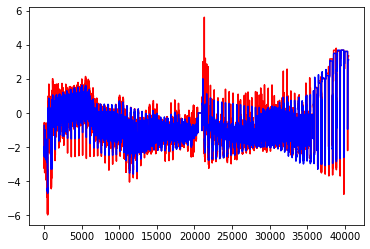

tensor(0.0607, grad_fn=<MseLossBackward>)
tensor(0.0604, grad_fn=<MseLossBackward>)
tensor(0.0602, grad_fn=<MseLossBackward>)
tensor(0.0597, grad_fn=<MseLossBackward>)
tensor(0.0599, grad_fn=<MseLossBackward>)
tensor(0.0592, grad_fn=<MseLossBackward>)
tensor(0.0595, grad_fn=<MseLossBackward>)
tensor(0.0594, grad_fn=<MseLossBackward>)
tensor(0.0598, grad_fn=<MseLossBackward>)
tensor(0.0611, grad_fn=<MseLossBackward>)
300


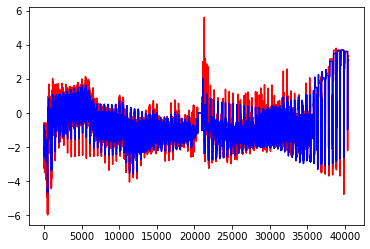

tensor(0.0626, grad_fn=<MseLossBackward>)
tensor(0.0650, grad_fn=<MseLossBackward>)
tensor(0.0696, grad_fn=<MseLossBackward>)
tensor(0.0716, grad_fn=<MseLossBackward>)
tensor(0.0711, grad_fn=<MseLossBackward>)
tensor(0.0639, grad_fn=<MseLossBackward>)
tensor(0.0584, grad_fn=<MseLossBackward>)
tensor(0.0581, grad_fn=<MseLossBackward>)
tensor(0.0623, grad_fn=<MseLossBackward>)
tensor(0.0648, grad_fn=<MseLossBackward>)
310


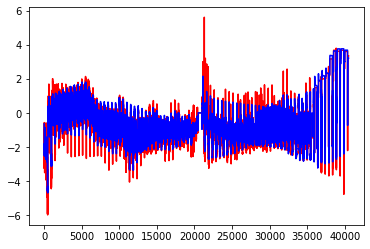

tensor(0.0626, grad_fn=<MseLossBackward>)
tensor(0.0589, grad_fn=<MseLossBackward>)
tensor(0.0572, grad_fn=<MseLossBackward>)
tensor(0.0588, grad_fn=<MseLossBackward>)
tensor(0.0605, grad_fn=<MseLossBackward>)
tensor(0.0598, grad_fn=<MseLossBackward>)
tensor(0.0577, grad_fn=<MseLossBackward>)
tensor(0.0563, grad_fn=<MseLossBackward>)
tensor(0.0566, grad_fn=<MseLossBackward>)
tensor(0.0577, grad_fn=<MseLossBackward>)
320


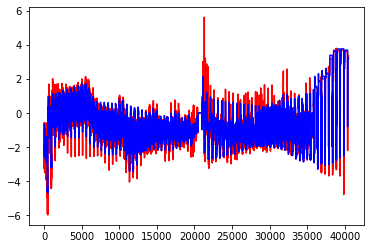

tensor(0.0577, grad_fn=<MseLossBackward>)
tensor(0.0568, grad_fn=<MseLossBackward>)
tensor(0.0557, grad_fn=<MseLossBackward>)
tensor(0.0553, grad_fn=<MseLossBackward>)
tensor(0.0556, grad_fn=<MseLossBackward>)
tensor(0.0560, grad_fn=<MseLossBackward>)
tensor(0.0565, grad_fn=<MseLossBackward>)
tensor(0.0562, grad_fn=<MseLossBackward>)
tensor(0.0556, grad_fn=<MseLossBackward>)
tensor(0.0548, grad_fn=<MseLossBackward>)
330


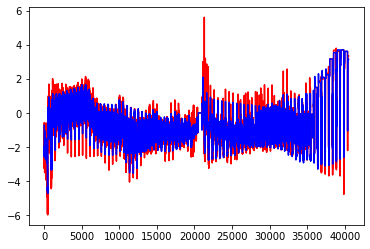

tensor(0.0544, grad_fn=<MseLossBackward>)
tensor(0.0543, grad_fn=<MseLossBackward>)
tensor(0.0544, grad_fn=<MseLossBackward>)
tensor(0.0547, grad_fn=<MseLossBackward>)
tensor(0.0550, grad_fn=<MseLossBackward>)
tensor(0.0556, grad_fn=<MseLossBackward>)
tensor(0.0561, grad_fn=<MseLossBackward>)
tensor(0.0574, grad_fn=<MseLossBackward>)
tensor(0.0585, grad_fn=<MseLossBackward>)
tensor(0.0604, grad_fn=<MseLossBackward>)
340


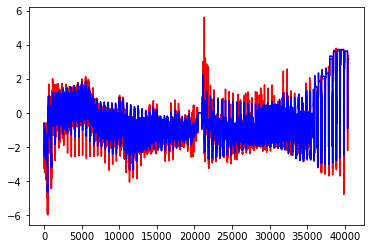

tensor(0.0617, grad_fn=<MseLossBackward>)
tensor(0.0630, grad_fn=<MseLossBackward>)
tensor(0.0609, grad_fn=<MseLossBackward>)
tensor(0.0578, grad_fn=<MseLossBackward>)
tensor(0.0542, grad_fn=<MseLossBackward>)
tensor(0.0530, grad_fn=<MseLossBackward>)
tensor(0.0541, grad_fn=<MseLossBackward>)
tensor(0.0562, grad_fn=<MseLossBackward>)
tensor(0.0579, grad_fn=<MseLossBackward>)


In [13]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state



for step in range(350):
    input_torch = torch.from_numpy(input)
    output_torch = torch.from_numpy(output)
    prediction = rnn(input_torch)   # rnn output
    loss = loss_func(prediction, output_torch)         # calculate loss
    print(loss)
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients
    
    if step % 10 == 0:
        print(step)
        plt.plot(output.flatten(), 'r-')
        plt.plot(prediction.data.numpy().flatten(), 'b-')
        plt.draw(); plt.pause(0.05)

In [23]:
def features2dataframe(features):
    model_size = features.shape[0] # how many layers we have == batch size
    theta_size = features.shape[1] # how many pieces in one layer == time step
    feature_len = features.shape[2]  # how many features we have (‘appro z’ is not a feature)
    
    column = ['target_theta','//X', 'Y', 'Z', 'Temp. approx. distances', 'Roughness (0.781197)',
           'Mean curvature (0.781197)', 'Gaussian curvature (0.781197)',
           'Normal change rate (0.781197)', 'Number of neighbors (r=0.781197)',
           'Surface density (r=0.781197)', 'Volume density (r=0.781197)',
           'Eigenvalues sum (0.781197)', 'Omnivariance (0.781197)',
           'Eigenentropy (0.781197)', 'Anisotropy (0.781197)',
           'Planarity (0.781197)', 'Linearity (0.781197)', 'PCA1 (0.781197)',
           'PCA2 (0.781197)', 'Surface variation (0.781197)',
           'Sphericity (0.781197)', 'Verticality (0.781197)', 'Nx', 'Ny', 'Nz', 
            'real_theta', 'R', 'r']

    df = []
    for i in range(model_size):
        for u in range(theta_size):
            current = features[i][u]
            df.append(current)
    df = pd.DataFrame(df, columns = column)
    return df

In [24]:
predict_input = features2dataframe(input3)
predict_input[['//X', 'Y', 'Z']].to_numpy()

array([[-1.99990501e+01, -1.99889997e-03,  7.30895996e-03],
       [-1.99980793e+01, -9.54208989e-03,  7.30895996e-03],
       [-1.99160480e+01, -6.40408695e-01,  7.30895996e-03],
       ...,
       [-9.59999084e-01,  3.22002411e-01,  1.98300018e+01],
       [-9.59999084e-01,  3.22002411e-01,  1.98300018e+01],
       [-9.59999084e-01,  3.22002411e-01,  1.98300018e+01]])

# 7 Test 
## 7.1 Preparing the test set
Use the points of the tear drop shape as the test set

In [25]:
test_input3 = np.delete(input3,0,2)
test_input3 = np.delete(test_input3,3,2)
input3_torch = torch.from_numpy(test_input3)
print(input3_torch.size())
output3_torch = torch.from_numpy(output3)
prediction_tear = rnn(input3_torch)/10
loss3 = loss_func(prediction_tear, output3_torch) 
print(loss3)

torch.Size([41, 500, 27])
tensor(0.0090, grad_fn=<MseLossBackward>)


## 7.2 Predict with the optimized RNN model 
Output the prediction to the csv file

In [26]:
prediction_tear = prediction_tear.data.numpy()
prediction_tear = np.reshape(prediction_tear,(-1,1))
print(np.shape(prediction_tear))
test_prediction = np.concatenate((predict_input[['//X', 'Y', 'Z']].to_numpy(), prediction_tear), axis=1)
np.savetxt("test_prediction_tear.csv", test_prediction, delimiter=",")

(20500, 1)
